PREP THE DATA

In [2]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('./cleandata.csv')

# Map the data types for each column
dtypes_mapping = {
'ID'                                  : 'str',
'Age'                                 : 'object',
'Residence'                           : 'category',
'V-SE-Power'                          : 'int',
'V-SE-Achievement'                   : 'int',
'AVG-V-Self-Enhacemen'                : 'float',
'V-O-Hedonism'                         : 'int',
'V-O-Stimulation'                       : 'int',
'V-O-Self_direction'                    : 'int',
'AVG-V-Openness_to_change'            : 'float',
'V-ST-Universalism'                     : 'int',
'V-ST-Benevolence'                      : 'int',
'AVG-V-Self_transcendence'            : 'float',
'V-C-Tradition'                         : 'int',
'V-C-Conformity'                        : 'int',
'V-C-Security'                          : 'int',
'AVG-V-Conservation'                  : 'float',
'P-OX-Aesthetic_appreciation'            : 'int',
'P-OX-Inquisitiveness'                   : 'int',
'P-OX-Creativity'                        : 'int',                  
'P-OX-Unconventionality'                 : 'int',
'P-E-Liveliness'                        : 'int',
'AVG-P-Opennes_to_experience'           : 'int',
'P-E-Social_self-esteem'                : 'int',
'P-E-Social_boldness'                   : 'int',
'P-E-Sociability'                       : 'int',
'AVG-P-Extraversion'                  : 'float',
'P-HH-Modesty'                          : 'int',
'P-HH-Greed avoidance'                  : 'int',
'P-HH-Fairness'                         : 'int',
'P-HH-Sincerity'                        : 'int',
'AVG-P-Honesty-Humility'              : 'float',
'ATT-Favourable'                        : 'int',
'ATT-Smart'                             : 'int',
'AVG-ATT'                             : 'float',
'BEH-take_part'                         : 'int',
'BEH-passenger-usage'                 : 'int',
'PARTIC-YES-passenger-explanation'    : 'str',
'BEH-driver-usage'                    : 'int',
'PARTIC-YES-driver-explanation'        : 'str',
'INT-passenger'                       : 'int',
'INT-passenger-explanation'            : 'str',
'INT-driver'                         : 'int',
'INT-driver-explanation'               : 'str',
}

df = df.astype(dtypes_mapping)

print("\nData Types for Each Column:")
print(df.dtypes)



Data Types for Each Column:
ID                                    object
Age                                   object
Residence                           category
V-SE-Power                             int64
V-SE-Achievement                       int64
AVG-V-Self-Enhacemen                 float64
V-O-Hedonism                           int64
V-O-Stimulation                        int64
V-O-Self_direction                     int64
AVG-V-Openness_to_change             float64
V-ST-Universalism                      int64
V-ST-Benevolence                       int64
AVG-V-Self_transcendence             float64
V-C-Tradition                          int64
V-C-Conformity                         int64
V-C-Security                           int64
AVG-V-Conservation                   float64
P-OX-Aesthetic_appreciation            int64
P-OX-Inquisitiveness                   int64
P-OX-Creativity                        int64
P-OX-Unconventionality                 int64
AVG-P-Opennes_to_experienc

AGE DISTRIBUTION

In [2]:
# Calculate the frequency "Age" 
age_frequency = df['Age'].value_counts()

# Calculate the percentage of frequency
age_percentage = (age_frequency / len(df)) * 100

# Calculate the cumulative percentage
cumulative_percentage = age_percentage.cumsum()

# Create a DataFrame with Age, Frequency, Percentage, and Cumulative Percentage
age_summary_df = pd.DataFrame({'Age': age_frequency.index, 'Frequency': age_frequency.values, 'Percentage': age_percentage.values, 'Cumulative Percentage': cumulative_percentage.values})

# Print the results
print("Frequency, Percentage, and Cumulative Percentage of Age:")
print(age_summary_df)

# Save the cleaned DataFrame to cleandata.csv
age_summary_df.to_csv('age.csv', index=False)
print("\nDataFrame has been saved as age.csv")

Frequency, Percentage, and Cumulative Percentage of Age:
     Age  Frequency  Percentage  Cumulative Percentage
0  25-34         91   51.123596              51.123596
1  35-44         46   25.842697              76.966292
2  45-54         17    9.550562              86.516854
3  18-24         14    7.865169              94.382022
4  55-64          8    4.494382              98.876404
5    65+          2    1.123596             100.000000

DataFrame has been saved as age.csv


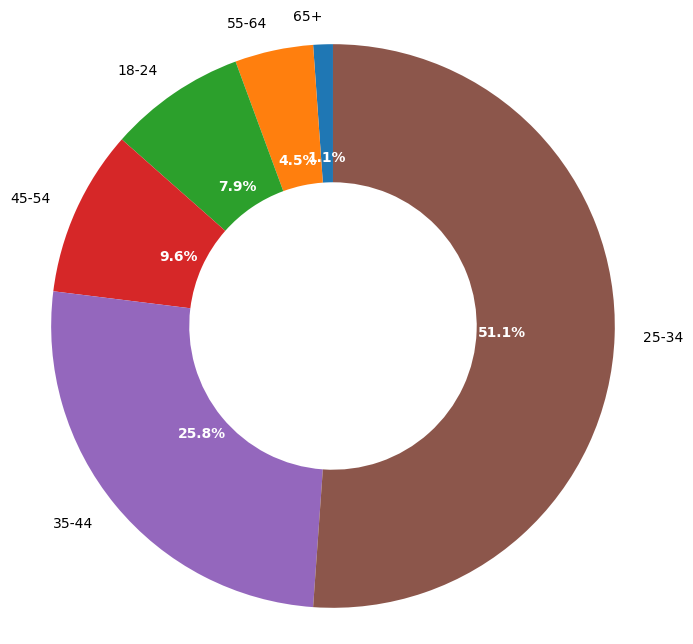

In [4]:
data_age = {
    'Age': ['25-34', '35-44', '45-54', '18-24', '55-64', '65+'],
    'Percentage': [51.123596, 25.842697, 9.550562, 7.865169, 4.494382, 1.123596]
}

df_age = pd.DataFrame(data_age)

# Sort the DataFrame by Percentage in descending order
sorted_df_age = df.sort_values(by='Percentage', ascending=True)

# Create a donut chart
plt.figure(figsize=(8, 8))

# Using 'tab10' colormap
colors = plt.cm.tab10(range(len(sorted_df_age)))

wedges, texts, autotexts = plt.pie(sorted_df_age['Percentage'], labels=sorted_df_age['Age'], autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.49), colors=colors)
plt.setp(autotexts, size=10, weight="bold", color="white")

# Draw a circle at the center of the donut chart to make it a donut chart
center_circle = plt.Circle((0, 0), 0.2, color='white', fc='white', linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

AGE CORRELATIONS

In [ ]:

from scipy.stats import spearmanr
from tabulate import tabulate

df = pd.read_csv('./cleandata.csv')

selected_variables = ['Age', 'AVG-ATT', 'BEH-take_part', 'BEH-passenger-usage', 'BEH-driver-usage', 'INT-passenger', 'INT-driver']
df_selected = df[selected_variables]

# Convert 'Age' to a categorical data type with an ordinal order
age_categories = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df_selected['Age'] = pd.Categorical(df_selected['Age'], categories=age_categories, ordered=True)

# Calculate Spearman correlation matrix
correlation_matrix, p_values = spearmanr(df_selected, nan_policy='omit')

# Print the variable names, correlation coefficients, and p-values
for i, var1 in enumerate(selected_variables):
    for j, var2 in enumerate(selected_variables):
        if i < j:  # To avoid printing duplicate pairs
            print(f"{var1} - {var2}:")
            print(f"Spearman correlation coefficient: {correlation_matrix[i, j]:.2f}")
            print(f"P-value: {p_values[i, j]:.3f}")
            print()

# Save the cleaned DataFrame to cleandata.csv
age_summary_df.to_csv('age.csv', index=False)
print("\nDataFrame has been saved as age.csv")


RESIDENCE

In [4]:
df = pd.read_csv('./cleandata.csv')

# Define the countries to be grouped as 'Other'
other_countries = ['Poland', 'Bulgaria', 'United States of America', 'Spain', 'Ireland', 'Brazil', 'Serbia', 
                   'United Kingdom of Great Britain and Northern Ireland', 'Sweden', 'Austria', 'Mexico', 
                   'Luxembourg', 'Latvia', 'Estonia', 'Czech Republic', 'Canada', 'Lithuania', 'Netherlands']


# Group 'Other' countries and sum their frequencies
other_frequency = residence_frequency[other_countries].sum()
residence_frequency_grouped = residence_frequency.drop(other_countries)
residence_frequency_grouped['Other'] = other_frequency


residence_frequency = df['Residence'].value_counts()

residence_percentage = (residence_frequency_grouped / len(df)) * 100

cumulative_percentage = residence_percentage.cumsum()


residence_summary_df = pd.DataFrame({'Residence': residence_frequency_grouped.index, 
                                     'Frequency': residence_frequency_grouped.values, 
                                     'Percentage': residence_percentage.values, 
                                     'Cumulative Percentage': cumulative_percentage.values})


print("Frequency, Percentage, and Cumulative Percentage of Residence:")
print(residence_summary_df)

# Save the cleaned DataFrame to csv
residence_summary_df.to_csv('residence.csv', index=False)
print("\nDataFrame has been saved as residence.csv")



Frequency, Percentage, and Cumulative Percentage of Residence:
  Residence  Frequency  Percentage  Cumulative Percentage
0  Slovenia         63   35.393258              35.393258
1   Germany         58   32.584270              67.977528
2   Finland         18   10.112360              78.089888
3   Croatia          8    4.494382              82.584270
4     Other         31   17.415730             100.000000

DataFrame has been saved as residence.csv


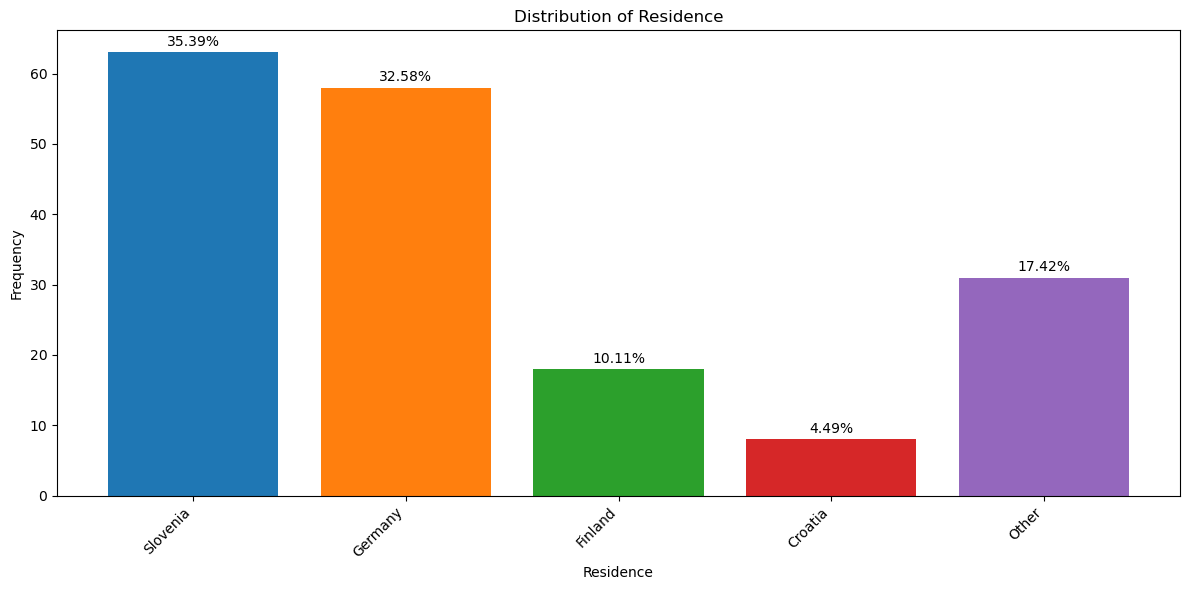

In [5]:

# Plot the bar chart
plt.figure(figsize=(12, 6))

# Using 'tab10' colormap
colors = plt.cm.tab10(range(len(residence_summary_df)))

bars = plt.bar(residence_summary_df['Residence'], residence_summary_df['Frequency'], color=colors)

plt.xlabel('Residence')
plt.ylabel('Frequency')
plt.title('Distribution of Residence')

# Add percentage labels on top of the bars
for bar, percentage in zip(bars, residence_summary_df['Percentage']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f'{percentage:.2f}%', ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

RESIDENCE CORRELATIONS

In [6]:
from scipy.stats import ttest_ind

selected_countries = ['Slovenia', 'Germany']
numerical_variables = ['AVG-ATT', 'BEH-take_part', 'BEH-passenger-usage', 'BEH-driver-usage', 'INT-passenger', 'INT-driver']

results_df = pd.DataFrame(columns=['Variable', 't-statistic', 'P-value'])

# Independent samples t-test for each variable
for variable in numerical_variables:
    data_slovenia = df[df['Residence'] == 'Slovenia'][variable]
    data_germany = df[df['Residence'] == 'Germany'][variable]

    # Perform independent samples t-test
    stat, p_value = ttest_ind(data_slovenia, data_germany, equal_var=True)
    
    # Determine significance level
    significance = ""
    if p_value < 0.05:
        significance = "*"
    if p_value < 0.01:
        significance = "**"
    if p_value < 0.001:
        significance = "***"

    results_df = results_df.append({'Variable': variable, 't-statistic': stat, 'P-value': p_value, 'Significance Level': significance}, ignore_index=True)

print("Results:")
print(results_df)

results_df.to_csv('independent_t_test_results.csv', index=False)

Results:
              Variable  t-statistic   P-value Significance Level
0              AVG-ATT    -0.796773  0.427169                   
1        BEH-take_part    -0.472806  0.637217                   
2  BEH-passenger-usage     1.463543  0.145955                   
3     BEH-driver-usage     2.912667  0.004281                 **
4        INT-passenger    -0.983552  0.327331                   
5           INT-driver    -0.201174  0.840906                   


/var/folders/s6/d9drx76x0952zv9k4v36kftw0000gp/T/ipykernel_74534/2385314645.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Variable': variable, 't-statistic': stat, 'P-value': p_value, 'Significance Level': significance}, ignore_index=True)
/var/folders/s6/d9drx76x0952zv9k4v36kftw0000gp/T/ipykernel_74534/2385314645.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Variable': variable, 't-statistic': stat, 'P-value': p_value, 'Significance Level': significance}, ignore_index=True)
/var/folders/s6/d9drx76x0952zv9k4v36kftw0000gp/T/ipykernel_74534/2385314645.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Variable': 

COMPARISSON for SI and DE

In [9]:
import pandas as pd

residences = ['Slovenia', 'Germany']

results_df = pd.DataFrame(columns=['Residence', 'Median BEH-driver-usage', 'Average BEH-driver-usage'])

# Calculate median and average for each residence
for residence in residences:
    data_residence = df[df['Residence'] == residence]['BEH-driver-usage']
    median_value = data_residence.median()
    average_value = data_residence.mean()
    
    results_df = results_df.append({'Residence': residence, 'Median BEH-driver-usage': median_value, 'Average BEH-driver-usage': average_value}, ignore_index=True)


print(results_df)

results_df.to_csv('residents_driver.csv', index=False)

  Residence  Median BEH-driver-usage  Average BEH-driver-usage
0  Slovenia                      1.0                  1.396825
1   Germany                      1.0                  1.103448


/var/folders/s6/d9drx76x0952zv9k4v36kftw0000gp/T/ipykernel_874/1270760470.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Residence': residence, 'Median BEH-driver-usage': median_value, 'Average BEH-driver-usage': average_value}, ignore_index=True)
/var/folders/s6/d9drx76x0952zv9k4v36kftw0000gp/T/ipykernel_874/1270760470.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Residence': residence, 'Median BEH-driver-usage': median_value, 'Average BEH-driver-usage': average_value}, ignore_index=True)
